In [17]:
# funciona

def sobel_function(img, mostrar=False):
    filtro_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filtro_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    img_x = cv2.filter2D(img, -1, filtro_x) #imagem, filtro e prfundidadi igual
    img_y = cv2.filter2D(img, -1, filtro_y)
 
    gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if mostrar:
        plt.imshow(gradient_magnitude.astype('uint8'), cmap='gray')
        plt.title("Sobel:Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude

In [18]:
def prewitt_function(img, mostrar=False):
    filtro_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    filtro_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    img_x = cv2.filter2D(img, -1, filtro_x) 
    img_y = cv2.filter2D(img, -1, filtro_y)
 
 
    gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if mostrar:
        plt.imshow(gradient_magnitude.astype('uint8'), cmap='gray')
        plt.title("Prewitt:Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude

In [21]:
def canny_function(img,limiarAlto,limiarBaixo):
    #imagem ja se encontra em grayscale
    #filtro gaussiano para reduzir o ruido
    img=cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
    
    #função de sobel para calcular a a magnitude do gradiente e a direção
    
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    
    mag = np.hypot(gx,gy)
    direcao= np.arctan(gy,gx)

    ##aplica a supressão do não maximo: afina as bordas

    zeros=np.zeros_like(mag) #uma matriz de zeros do tamaho de mag

    for i in range(1,zeros.shape[0]-1): 
        for j in range(1,zeros.shape[0]-1):
            #vamos determinar a direção da borda
            if(direcao[i,j]<-7/8*np.pi or direcao[i,j]>=7/8*np.pi)or(direcao[i, j] < 1 / 8 * np.pi and direcao[i, j] >= -1 / 8 * np.pi):
                #leste-oeste
                if mag[i,j] >= mag[i,j-1] and mag[i,j] >= mag[i,j+1]:
                    zeros[i,j]=mag[i,j]
            elif (direcao[i, j] < -5 / 8 * np.pi and direcao[i, j] >= -7 / 8 * np.pi) or (direcao[i, j] < 3 / 8 * np.pi and direcao[i,j] >= 1 / 8 * np.pi):
                #outra direção
                if mag[i,j] >= mag[i-1,j+1].any() and mag[i,j]>=mag[i+1,j-1].any():
                    zeros[i,j]=mag[i,j]
            elif (direcao[i,j]<-3/8*np.pi.any() and direcao[i,j]>=-5/8*np.pi).any() or (direcao[i,j]<5/8*np.pi.any() and direcao[i,j]>=3/8*np.pi).any(): 
                # North-South
                if mag[i,j]>=mag[i-1,j].any() and mag[i,j]>=mag[i+1,j].any():
                    zeros[i,j]=mag[i,j]
            else:
                # Northwest-Southeast
                if mag[i,j]>=mag[i-1,j-1].any() and mag[i,j]>=mag[i+1,j+1].any():
                    zeros[i,j]=mag[i,j]

        #aplicar o limiar para determinar as bordas fortes e fracas 
        alto = np.max(zeros) * limiarAlto
        baixo = alto * limiarBaixo
        forte = np.zeros_like(zeros)
        fraco = np.zeros_like(zeros)
        forte[zeros >= alto] = 255
        fraco[(zeros < alto) & (zeros >= baixo)] = 255   
        
    for i in range(1,forte.shape[0]-1):
        for j in range(1,forte.shape[1]-1):
            if fraco[i,j]==255:
                if fraco[(i-1):(i+2),(j-1):(j+2)].any():
                    fraco[i,j]=255
                    
    plt.imshow(forte.astype('uint8'), cmap='gray')
    plt.title("Canny:Gradient Magnitude")
    plt.show()               

    return forte
    

Selecione a função:
1. Sobel Function
2. Prewitt Function
3. Canny Function
0. Sair
Digite o número da função desejada: 1
Digite o diretório da imagem: Img1.jpg


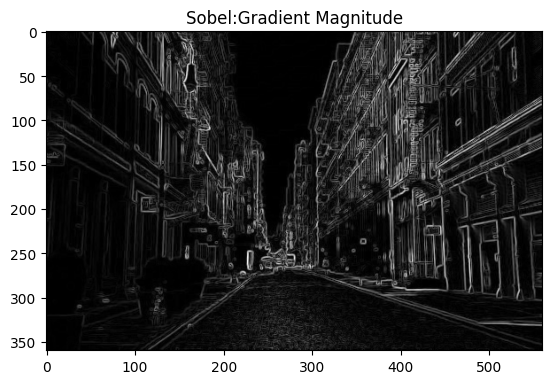

Selecione a função:
1. Sobel Function
2. Prewitt Function
3. Canny Function
0. Sair


In [ ]:
#bibliotecas
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
def main():
    while True:
        print("Selecione a função:")
        print("1. Sobel Function")
        print("2. Prewitt Function")
        print("3. Canny Function")
        print("0. Sair")
        escolha = int(input("Digite o número da função desejada: "))
        if escolha == 0:
            break
        elif escolha == 1:
            img_path = input("Digite o diretório da imagem: ")
            img = cv2.imread(img_path)
            img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
            sobel_function(img, mostrar=True)
        elif escolha == 2:
            img_path = input("Digite o diretório da imagem: ")
            img = cv2.imread(img_path)
            img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
            prewitt_function(img, mostrar=True)
        elif escolha == 3:
            img_path = input("Digite o diretório da imagem: ")
            img = cv2.imread(img_path)
            img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
            thresh1 = 0.7  # Valor de threshold 1 pré-definido
            thresh2 = 0.2  # Valor de threshold 2 pré-definido
            canny_function(img, thresh1, thresh2)
        else:
            print("Opção inválida. Tente novamente.")

if __name__ == "__main__":
    main()